In [ ]:
import io
import nltk
from nltk import word_tokenize
from nltk.book import FreqDist

with io.open("sample.txt", "r", encoding="utf8") as f:
    text = f.read()

fdist = FreqDist(text)

tokens = word_tokenize(text, language="russian")
print(tokens[:10])

nltk.pos_tag(tokens, lang='rus')


[['случае', 'будем', 'счастливы'], ['безусловно'], []]
и
в
во
не
что
он
на
я
с
со
как
а
то
все
она
так
его
но
да
ты
к
у
же
вы
за
бы
по
только
ее
мне
было
вот
от
меня
еще
нет
о
из
ему
теперь
когда
даже
ну
вдруг
ли
если
уже
или
ни
быть
был
него
до
вас
нибудь
опять
уж
вам
ведь
там
потом
себя
ничего
ей
может
они
тут
где
есть
надо
ней
для
мы
тебя
их
чем
была
сам
чтоб
без
будто
чего
раз
тоже
себе
под
будет
ж
тогда
кто
этот
того
потому
этого
какой
совсем
ним
здесь
этом
один
почти
мой
тем
чтобы
нее
сейчас
были
куда
зачем
всех
никогда
можно
при
наконец
два
об
другой
хоть
после
над
больше
тот
через
эти
нас
про
всего
них
какая
много
разве
три
эту
моя
впрочем
хорошо
свою
этой
перед
иногда
лучше
чуть
том
нельзя
такой
им
более
всегда
конечно
всю
между
это
это


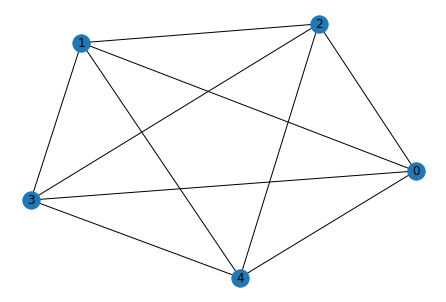

In [3]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import networkx as nx

G = nx.complete_graph(5)
nx.draw(G, with_labels=True)

sentences = [["Но", "в", "этом", "случае", "мы", "все", "будем", "счастливы"], ["Безусловно"], ["Это","так"]]
new_sentences = []
stopw = []
for word in stopwords.words('russian'):
    stopw.append(word)
stopw.append("это")

low_sentences = []
for sent in sentences:
    new_list = [word.lower() for word in sent]
    low_sentences.append(new_list)

for sent in low_sentences:
    new_list = [word for word in sent if word.isalnum()
                and word not in stopw]
    new_sentences.append(new_list)

print(new_sentences)
stopw.extend(["это"])
for word in stopw:
    print(word)

In [46]:
import pandas as pd

df = pd.DataFrame({
"Name": ["Braund, Mr. Owen Harris",
"Allen, Mr. William Henry",
"Bonnell, Miss. Elizabeth"],
"Age": [22, 35, 58],
"Sex": ["male", "male", "female"]}
)

df["Name"]

<bound method NDFrame._add_numeric_operations.<locals>.mad of 0     Braund, Mr. Owen Harris
1    Allen, Mr. William Henry
2    Bonnell, Miss. Elizabeth
Name: Name, dtype: object>

In [15]:
from owlready2 import *
import rdflib

class SparqlQueries:
    def __init__(self):
        my_world = World()
        my_world.get_ontology("file://C:\\Users\\Nik\\onto.owl").load() 
        #sync_reasoner(my_world)  #reasoner is started and synchronized here
        self.graph = my_world.as_rdflib_graph()

    def search(self):
        #Search query is given here
        #Base URL of your ontology has to be given here
        query = """
                PREFIX dbo: <http://dbpedia.org/ontology/>
                PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
                PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
                SELECT * WHERE 
{ ?s ?p ?o .
} LIMIT 3
                """

        #query is being run
        resultsList = self.graph.query(query)

        # #creating json object
        # response = []
        # for item in resultsList:
        #     s = str(item['s'].toPython())
        #     s = re.sub(r'.*#',"",s)
        #
        #     p = str(item['p'].toPython())
        #     p = re.sub(r'.*#', "", p)
        #
        #     o = str(item['o'].toPython())
        #     o = re.sub(r'.*#', "", o)
        #     response.append({'s' : s, 'p' : p, "o" : o})

        for item in resultsList:
            print(item) #just to show the output
        return resultsList


runQuery = SparqlQueries()
runQuery.search()

file://C:\Users\Nik\onto.owl# does not look like a valid URI, trying to serialize this will break.
(rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Ontology'), rdflib.term.BNode('1'))
(rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#AnnotationProperty'), rdflib.term.URIRef('http://dbpedia.org/ontology/birthDate'))
(rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#AnnotationProperty'), rdflib.term.URIRef('http://dbpedia.org/ontology/birthName'))


In [11]:
from owlready2 import *

world = World()
onto = world.get_ontology(
    "file://C:\Users\Nik\Desktop\6 семестр\Семантическийвеб\Практика\pizza.owl").load()

for dis in onto.disjoint_classes():
    print(dis)

print("---")

for ax in onto.general_axioms():
    print(ax)

AllDisjoint([C:\Dev\Python\course_project\OOPOntology.МодификаторДоступа, C:\Dev\Python\course_project\OOPOntology.ПонятиеООП, C:\Dev\Python\course_project\OOPOntology.ТипДанных, C:\Dev\Python\course_project\OOPOntology.ЯзыкПрограммирования])
---
